In [1]:
import cupy as cp  # type: ignore
import matplotlib.pyplot as plt  # type: ignore

In [2]:
NUM_ITERATIONS = 10
NUM_WOLFS = 10

In [3]:
def cost_function(sample):
    return (sample - 3) ** 2 + 4

In [4]:
def generate_wolf():
    position = cp.random.uniform(low=-100.0, high=100.0, size=1)
    position = position.item()

    return {"position": position, "score": cost_function(position), "type": "omega"}

In [5]:
def determine_leaders(wolfs):
    for wolf in wolfs:
        wolf["type"] = "omega"

    wolfs = sorted(wolfs, key=lambda x: x["score"])
    wolfs[0]["type"] = "alpha"
    wolfs[1]["type"] = "beta"
    wolfs[2]["type"] = "delta"
    
    return wolfs

In [6]:
def calculate_a(iteration):
    return 2 * (1 - iteration / (NUM_ITERATIONS - 1))

In [7]:
def calculate_distance(x_leader, x_omega, iteration):
    a = calculate_a(iteration)
    r1 = cp.random.rand()
    r2 = cp.random.rand()
    A = 2 * a * r1 - a
    C = 2 * r2
    D_leader = cp.abs(C * x_leader - x_omega)

    return D_leader, A

In [8]:
def update_position(wolfs, iteration):
    wolfs_to_update = wolfs[3:]

    X_alpha = wolfs[0]["position"]
    X_beta = wolfs[1]["position"]
    X_delta = wolfs[2]["position"]

    for omega_wolf in wolfs_to_update:
        D_alpha, A_1 = calculate_distance(X_alpha, omega_wolf["position"], iteration)
        D_beta, A_2 = calculate_distance(X_beta, omega_wolf["position"], iteration)
        D_delta, A_3 = calculate_distance(X_delta, omega_wolf["position"], iteration)

        X_1 = X_alpha - A_1 * D_alpha
        X_2 = X_beta - A_2 * D_beta
        X_3 = X_delta - A_3 * D_delta

        omega_wolf["position"] = (X_1 + X_2 + X_3) / 3
        omega_wolf["position"] = omega_wolf["position"].item()
        omega_wolf["score"] = cost_function(omega_wolf["position"])

In [9]:
def plot(wolfs):
    # Obtendo os valores de posição como NumPy array
    positions = cp.asnumpy([wolf["position"] for wolf in wolfs])

    # Criando o gráfico com uma linha horizontal e pontos em positions
    plt.figure(figsize=(22, 4))
    plt.plot(
        positions,
        [0] * len(positions),
        marker="o",
        color="b",
        linestyle="",
        label="Pontos",
    )  # Plotando pontos em positions, eixo y fixado em zero
    plt.xlabel("Valor de X")  # Nomeando o eixo x
    plt.ylabel("Valor de Y")  # Nomeando o eixo y
    plt.title("Gráfico de Linha Unidimensional com Pontos")
    plt.xlim(-100, 100)
    plt.legend()  # Mostrando a legenda
    plt.grid(True)  # Adicionando grade ao gráfico (opcional)
    plt.show()  # Exibindo o gráfico

In [10]:
wolfs = [generate_wolf() for _ in range(NUM_WOLFS)]

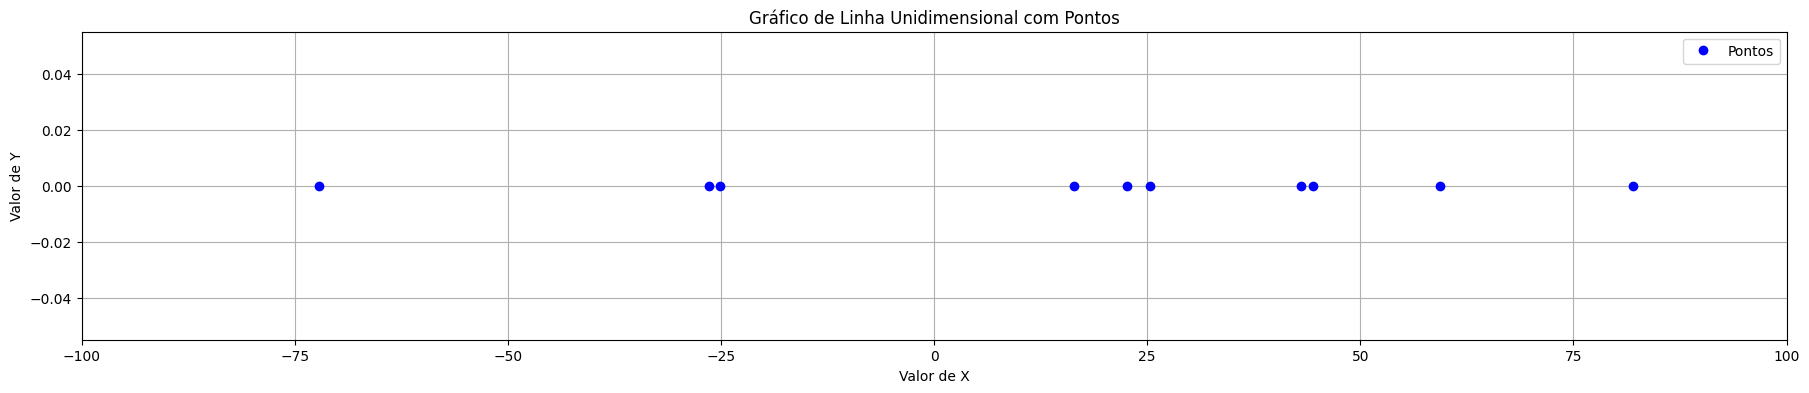

In [11]:
plot(wolfs)

In [12]:
for i in range(NUM_ITERATIONS):
    print(f"Iteration {i+1}")
    wolfs = determine_leaders(wolfs)
    update_position(wolfs, i)

Iteration 1
Iteration 2
Iteration 3
Iteration 4
Iteration 5
Iteration 6
Iteration 7
Iteration 8
Iteration 9
Iteration 10


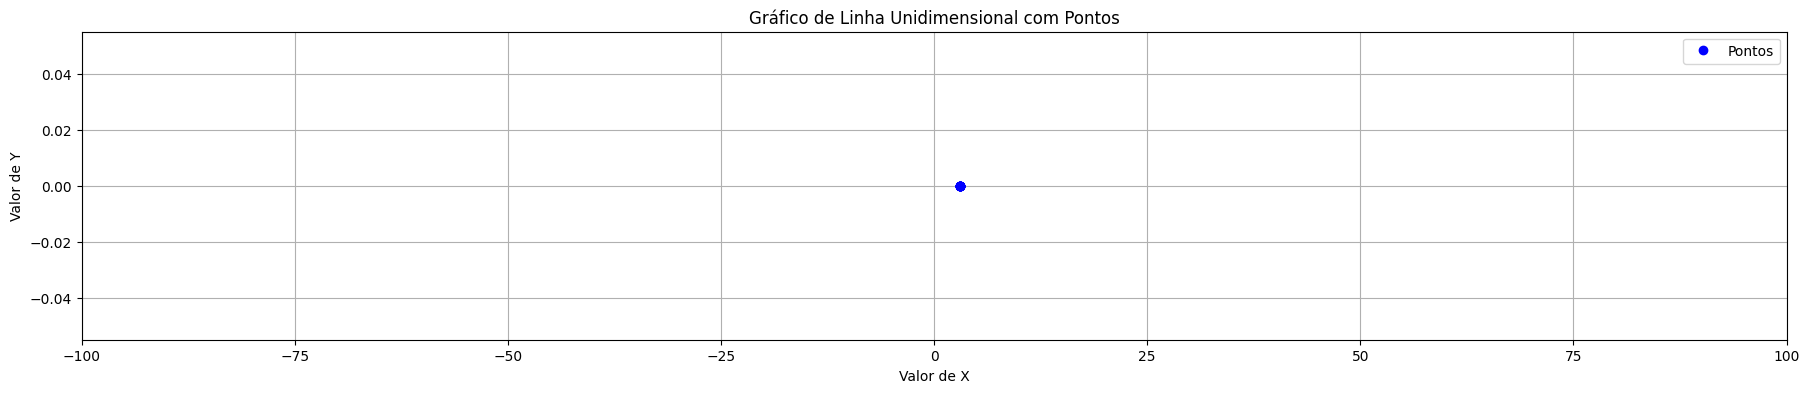

In [13]:
plot(wolfs)